<a href="https://colab.research.google.com/github/jaesuun/sjtg_project/blob/main/DatasetLoader(updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import unicodedata

string = '인코딩의 블로그'

uni1 = unicodedata.normalize('NFD',string)
print(uni1)

uni2 = unicodedata.normalize('NFC',uni1)
print(uni2)

인코딩의 블로그
인코딩의 블로그


In [8]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 18 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [1]:
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [2]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader
import numpy as np
import torchvision
from torchvision import transforms


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trans = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

file_path ='/content/drive/My Drive/kfood_val/val'
# "transform" 대신 "transforms"를 사용합니다.
trainset = torchvision.datasets.ImageFolder(root=file_path, transform=trans)

In [ ]:
trainset.__getitem__(18)

(tensor([[[ 0.4353,  0.4275,  0.4510,  ..., -0.3725, -0.1765, -0.1059],
          [ 0.4510,  0.4353,  0.4588,  ..., -0.7412, -0.6235, -0.4353],
          [ 0.4588,  0.4510,  0.4667,  ..., -0.8353, -0.8039, -0.7725],
          ...,
          [-0.8196, -0.8510, -0.8745,  ..., -0.8824, -0.8353, -0.7333],
          [-0.8196, -0.8510, -0.8667,  ..., -0.8588, -0.7569, -0.6706],
          [-0.8353, -0.8510, -0.8667,  ..., -0.8667, -0.7647, -0.7569]],
 
         [[-0.0353, -0.0431, -0.0196,  ..., -0.4196, -0.2235, -0.1451],
          [-0.0196, -0.0353, -0.0118,  ..., -0.7961, -0.6706, -0.4745],
          [-0.0118, -0.0196, -0.0039,  ..., -0.8745, -0.8588, -0.8118],
          ...,
          [-0.8588, -0.8824, -0.9059,  ..., -0.7961, -0.7020, -0.5608],
          [-0.8510, -0.8824, -0.8980,  ..., -0.7569, -0.6000, -0.4667],
          [-0.8667, -0.8824, -0.8980,  ..., -0.7569, -0.6000, -0.5686]],
 
         [[-0.3020, -0.3255, -0.3020,  ..., -0.3569, -0.1137,  0.0039],
          [-0.2863, -0.3098,

In [ ]:
len(trainset)

4198

In [ ]:
classes=trainset.classes
classes

['갈비구이',
 '갈치구이',
 '감자전',
 '경단',
 '계란국',
 '계란말이',
 '계란후라이',
 '고등어구이',
 '곱창구이',
 '김밥',
 '김치볶음밥',
 '김치전',
 '꿀떡',
 '누룽지',
 '닭갈비',
 '더덕구이',
 '동그랑땡',
 '떡갈비',
 '떡국_만두국',
 '무국',
 '미역국',
 '북엇국',
 '불고기',
 '비빔밥',
 '삼겹살',
 '새우볶음밥',
 '생선전',
 '송편',
 '시래기국',
 '알밥',
 '유부초밥',
 '육개장',
 '잡곡밥',
 '장어구이',
 '조개구이',
 '조기구이',
 '주먹밥',
 '콩나물국',
 '파전',
 '호박전',
 '황태구이',
 '훈제오리']

In [ ]:
trainloader=DataLoader(trainset,batch_size=16,shuffle=False,num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(labels)

AttributeError: ignored

In [ ]:
def imshow(img):
  img=img/2+0.5
  np_img=img.numpy()
  plt.imshow(np.transpose(np_img,(1,2,0)))

  print(np_img.shape)
  print((np.transpose(np_img,(1,2,0))).shape)

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images,nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print( )

NameError: ignored

In [ ]:
!pip install -q matplotlib
!apt-get install -y fonts-nanum

# 런타임 다시 시작 (런타임 -> 런타임 다시 시작)

# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

# 그래프 그릴 때 폰트 설정
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,559 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 120876 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 설정
font_name = plt.matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()

AttributeError: ignored

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
from google.colab import drive

# 데이터셋 클래스 정의
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.data = datasets.ImageFolder(root=root_dir, transform=transform)
        self.class_names = self.data.classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 데이터 변환 정의 (원하는 변환을 추가 또는 수정하세요)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # 데이터셋을 불러옵니다.
# train_dataset = datasets.ImageFolder('train_data', transform=transform)  # 'train_data'에 훈련 데이터 경로를 설정하세요
# test_dataset = datasets.ImageFolder('train_data', transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
# test_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)





# 데이터셋 및 데이터로더 설정
root_directory = '/content/drive/My Drive/kfood_val/val'  # Google Drive 내의 데이터 경로로 수정하세요
dataset = CustomDataset(root_dir=root_directory, transform=transform)
print(dataset.class_names)
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)



['갈비구이', '갈치구이', '감자전', '경단', '계란국', '계란말이', '계란후라이', '고등어구이', '곱창구이', '김밥', '김치볶음밥', '김치전', '꿀떡', '누룽지', '닭갈비', '더덕구이', '동그랑땡', '떡갈비', '떡국_만두국', '무국', '미역국', '북엇국', '불고기', '비빔밥', '삼겹살', '새우볶음밥', '생선전', '송편', '시래기국', '알밥', '유부초밥', '육개장', '잡곡밥', '장어구이', '조개구이', '조기구이', '주먹밥', '콩나물국', '파전', '호박전', '황태구이', '훈제오리']


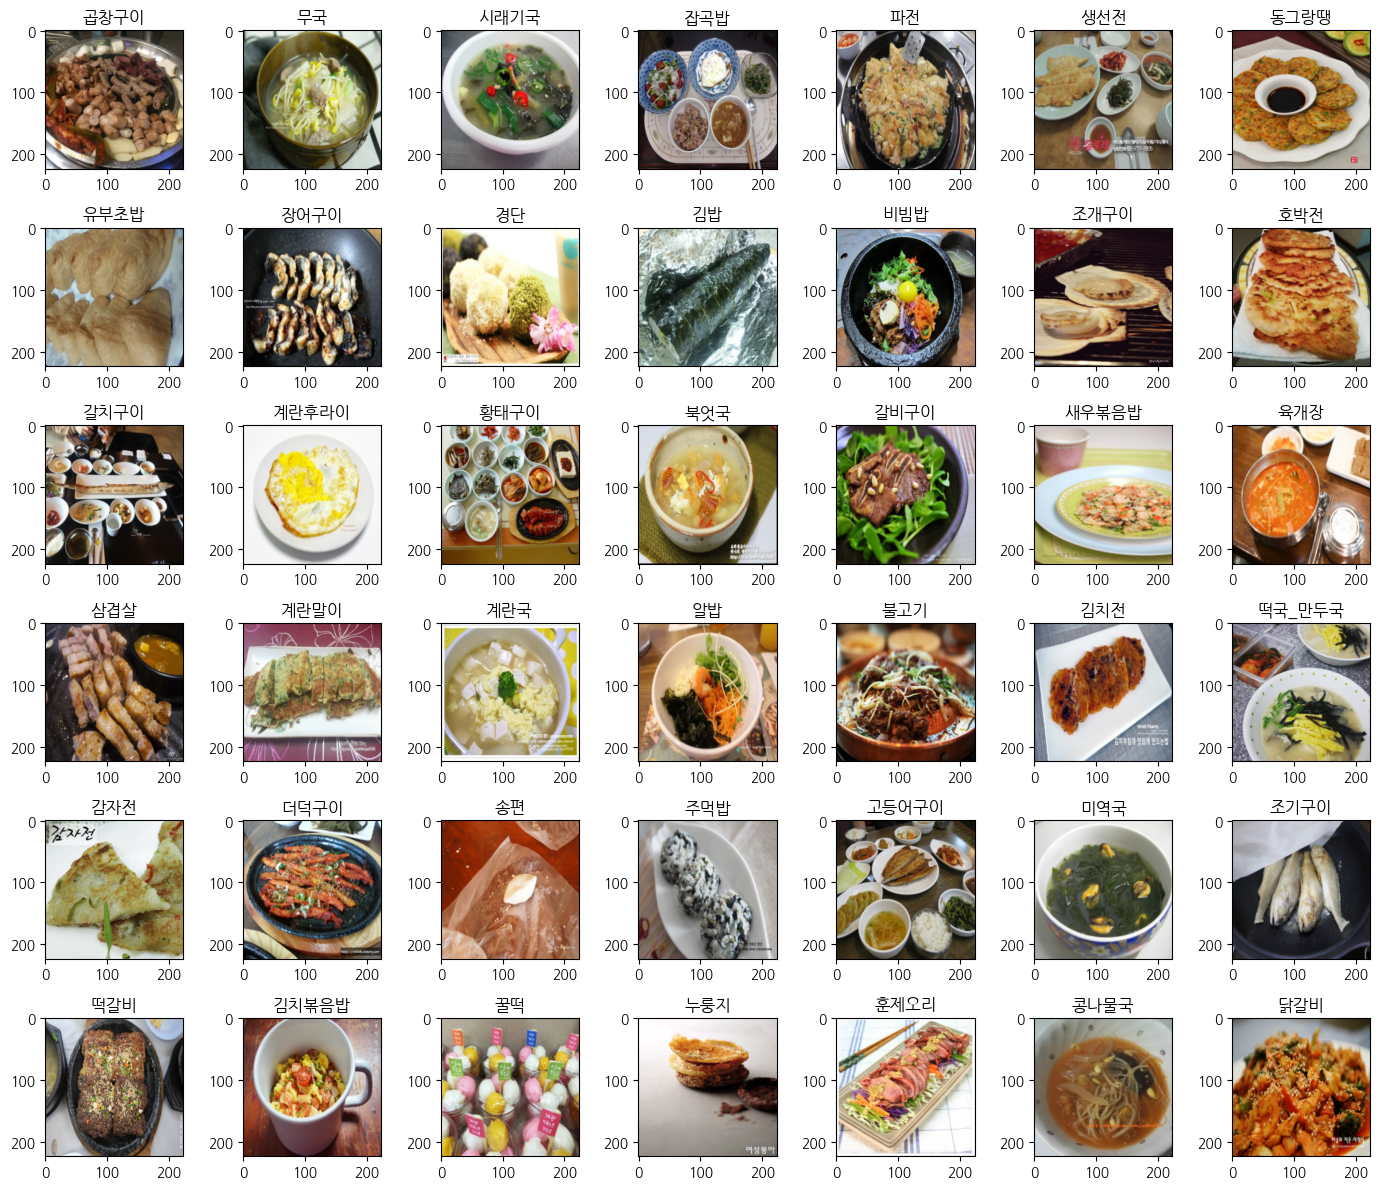

In [15]:
# 클래스별로 예시 이미지를 시각화
fig, axes = plt.subplots(6, 7, figsize=(14, 12))

class_set1=[]
idx= 0
for i, (image, label) in enumerate(data_loader):
    class_name1=dataset.class_names[label.item()]
    if dataset.class_names[label.item()] not in class_set1:
        class_set1.append(class_name1)
    else:
      continue

    ax = axes[ idx//7, idx % 7]
    ax.imshow(image[0].permute(1, 2, 0).numpy())  # 이미지 텐서를 Matplotlib 형식으로 변환
    uni1 = unicodedata.normalize('NFD',class_name1)

    uni2 = unicodedata.normalize('NFC',uni1)
    ax.set_title(uni2)
    idx+=1
    if len(class_set1)>=42:
      break
    # if i >= 42:
    #     break
    # print(label)
    # print(dataset.class_names[label.item()])
    # ax = axes[i // 7, i % 7]
    # ax.imshow(image[0].permute(1, 2, 0).numpy())  # 이미지 텐서를 Matplotlib 형식으로 변환
    #ax.set_title(dataset.class_names[label.item()])
    # ax.axis('off')

plt.tight_layout()
plt.show()

계란말이
계란말이


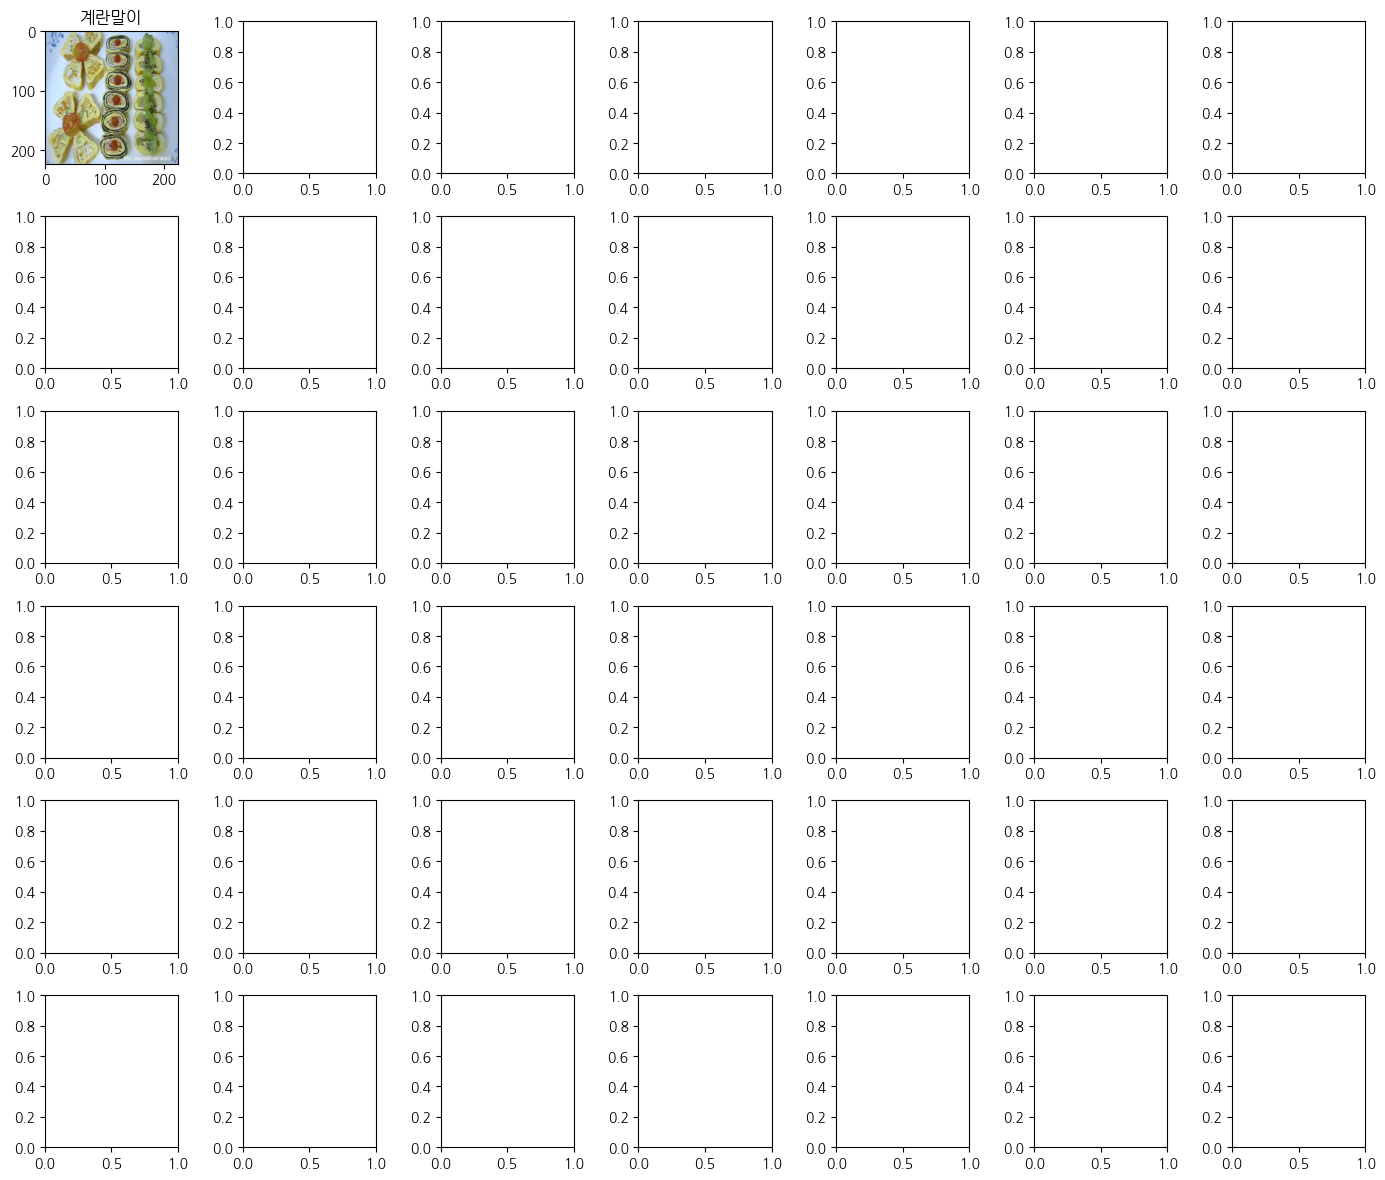

In [13]:
# 클래스별로 예시 이미지를 시각화
fig, axes = plt.subplots(6, 7, figsize=(14, 12))

class_set1=[]
idx= 0

for i, (image, label) in enumerate(data_loader):
    class_name1=dataset.class_names[label.item()]
    if dataset.class_names[label.item()] not in class_set1:
        class_set1.append(class_name1)
    else:
      continue

    ax = axes[ idx//7, idx % 7]
    ax.imshow(image[0].permute(1, 2, 0).numpy())  # 이미지 텐서를 Matplotlib 형식으로 변환
    import unicodedata

    string = class_name1

    uni1 = unicodedata.normalize('NFD',string)


    uni2 = unicodedata.normalize('NFC',uni1)

    #ax.set_title(str(class_name1))
    ax.set_title(uni2)
    idx+=1
    if len(class_set1)>=1:
      break
    # if i >= 42:
    #     break
    # print(label)
    # print(dataset.class_names[label.item()])
    # ax = axes[i // 7, i % 7]
    # ax.imshow(image[0].permute(1, 2, 0).numpy())  # 이미지 텐서를 Matplotlib 형식으로 변환
    #ax.set_title(dataset.class_names[label.item()])
    # ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 데이터 변환을 정의합니다.
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 데이터셋을 불러옵니다.
train_dataset = datasets.ImageFolder('dataset', transform=transform)  # 'dataset'은 데이터 폴더의 경로입니다.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_dataset = datasets.ImageFolder('test_data', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# 클래스 이름을 불러옵니다.
class_names = train_dataset.classes

# 데이터로더에서 이미지를 시각화합니다.
def imshow(img):
    img = img / 2 + 0.5  # 데이터를 언노말라이즈합니다.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 무작위로 예시 이미지를 가져와서 시각화합니다.
dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.figure(figsize=(15, 7))
for i in range(42):
    plt.subplot(6, 7, i + 1)
    imshow(images[i])
    plt.title(class_names[labels[i]])

plt.show()